# Early Diabetes Risk Prediction 

Data set link  - https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

Dataset Description :
The dataset is designed for early-stage diabetes risk prediction and consists of 520 records with 17 attributes. It includes demographic information such as age and gender, along with clinical and symptom-based features like polyuria, polydipsia, sudden weight loss, weakness, visual blurring, itching, and more. The target variable, labeled as "class," indicates whether a patient is at risk for diabetes, classified as either "Positive" or "Negative." The features are primarily binary or categorical, capturing key indicators of diabetes risk. This dataset provides a comprehensive overview of early symptoms and characteristics associated with diabetes, making it suitable for predictive modeling and analysis.


In [2]:
# to connect our Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

# 1: Install Dependencies and Import Libraries

In [ ]:
# Installing required libraries
# pandas: For data manipulation and analysis, providing data structures like DataFrames.
# numpy: For numerical computations and array operations.
# scikit-learn: For machine learning tasks, including preprocessing and model building
# seaborn: For creating visually statistical plots.
# matplotlib: For basic plotting and data visualization.

!pip install pandas numpy scikit-learn seaborn matplotlib

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# 2: Load the Dataset

In [ ]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes_data_upload.csv')

# Display basic dataset information
print("First few rows of the dataset:\n\n")
print(df.head())


First few rows of the dataset:


   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0      

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (520, 17)


In [ ]:
print("Dataset summary:")
print(df.info())

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class    

# 3: Visualize Missing Data

Missing values in each column:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


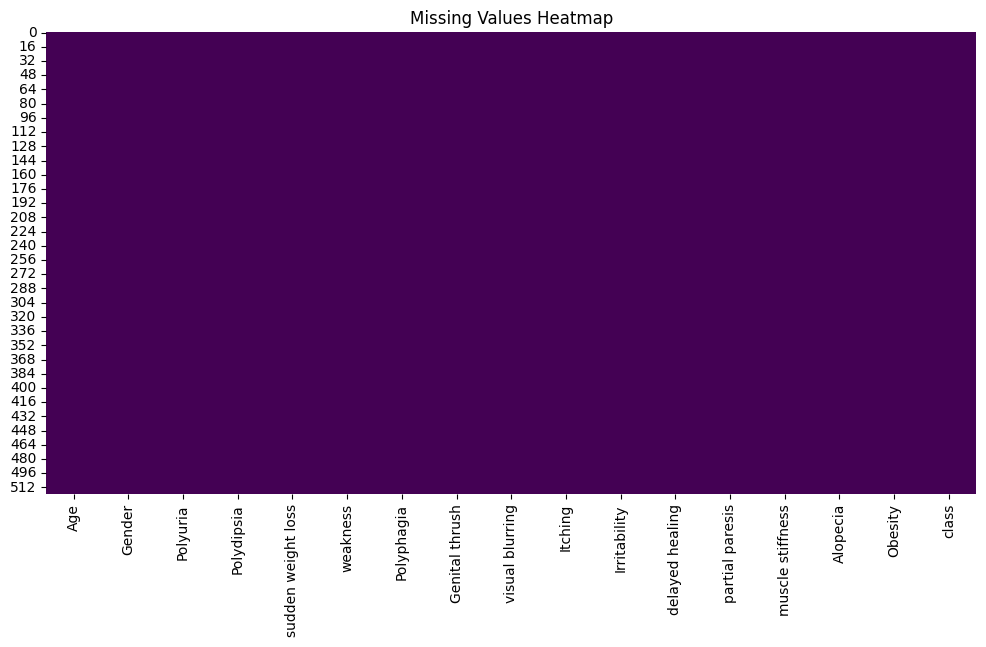

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


The dataset consists of 16 columns, including the target variable class. Upon checking for missing values, it was found that none of the columns have any missing data. Below is a breakdown of the results:

Total columns: 16
Columns with missing values: 0
Each column in the dataset, such as Age, Gender, Polyuria, Polydipsia, and others, has complete data with no missing entries. This indicates that the dataset is clean in terms of missing values and is ready for further analysis or preprocessing without requiring imputation or removal of missing data points.

# 4: Data Preprocessing

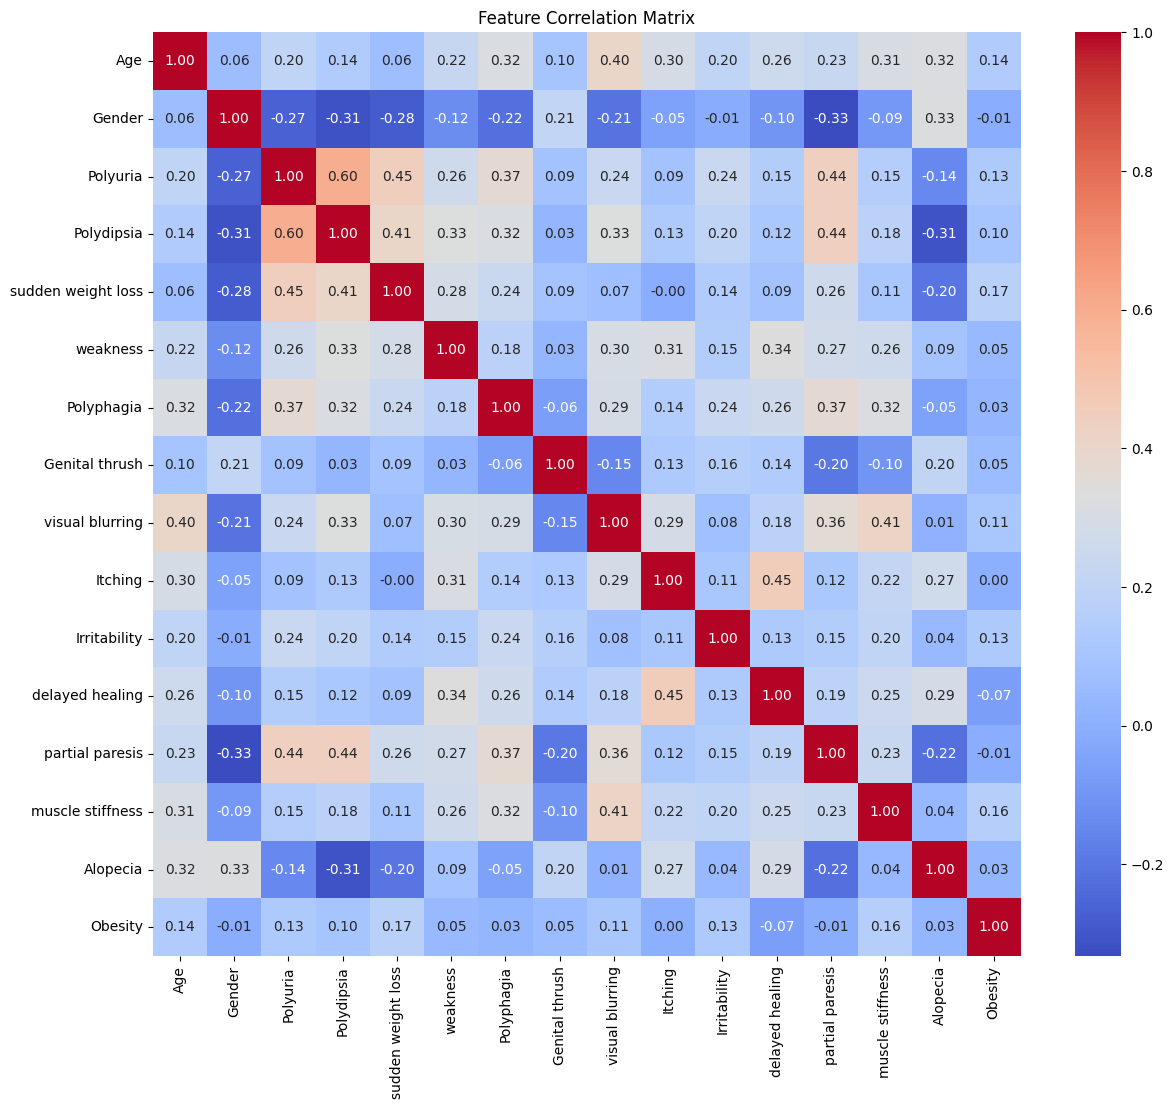

In [ ]:
# Encoding: transforming categorical values to numeric format for machine learning models
le = LabelEncoder()
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix for feature selection
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


# 5: Visualize Numerical Features Distribution

In [ ]:
# Printing the column names
print(df.columns)


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


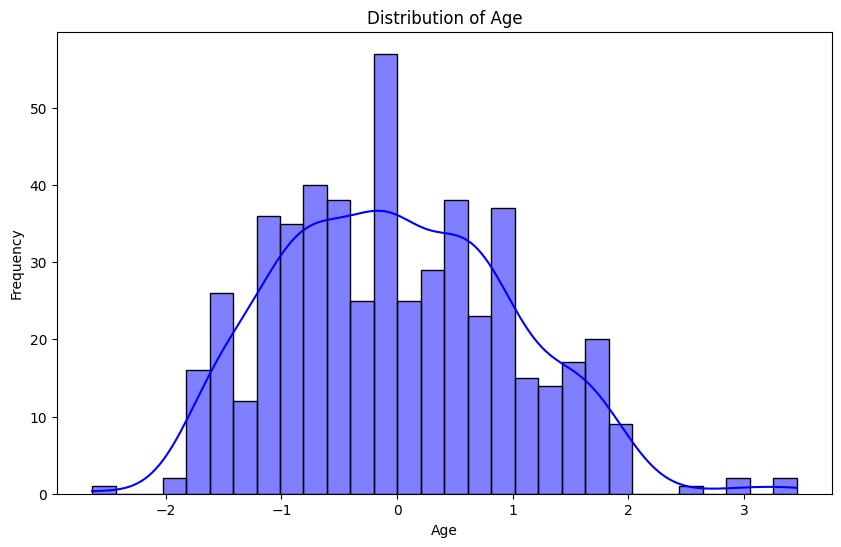

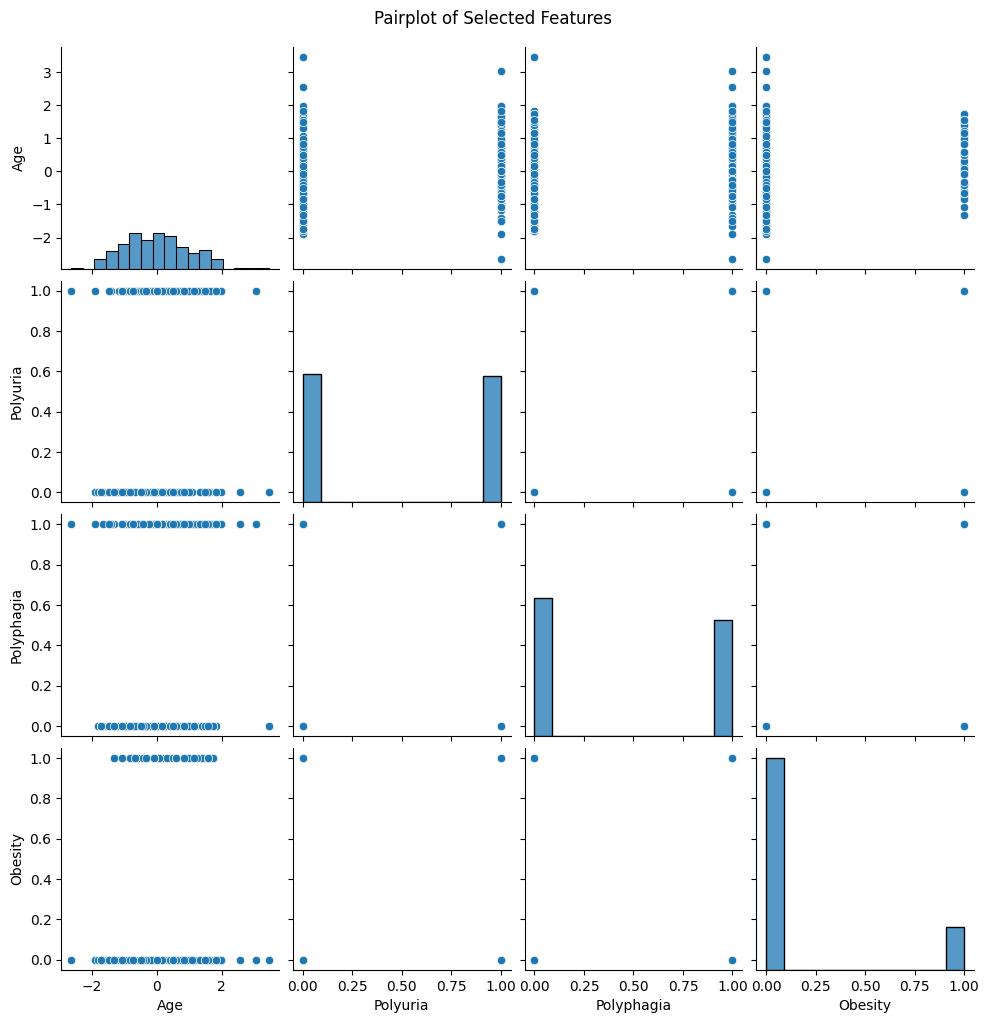

In [ ]:
# Plot histogram for numerical columns like 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pairplot for visualizing relationships between features
sns.pairplot(df[['Age', 'Polyuria', 'Polyphagia', 'Obesity']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


###    1. Distribution of Age
* The histogram displays the distribution of the Age feature, which appears to be somewhat normally distributed but with some skewness to the right. The density curve indicates that most of the age data is clustered around the mean, with a few outliers on both ends.  
* The data spans a wide range, and there is a noticeable peak around the center, indicating that most individuals fall within a certain age bracket.  
### 2. Pairplot of Selected Features
* The pairplot provides a visual relationship among Age, Polyuria, Polyphagia, and Obesity.  
* Features such as Polyuria and Polyphagia are binary, so their plots mostly show clusters around 0 and 1, indicating categorical data.  
* The plot between Age and the binary features (Polyuria, Polyphagia, Obesity) highlights potential patterns or correlations where certain symptoms might be more common in specific age groups.  
* Obesity also shows a strong categorical distribution, with most of the data points at 0, indicating that a large portion of the dataset does not have this feature.  
#### **Observations**:  
* The distribution and relationships suggest that some features are categorical, which could indicate binary or nominal characteristics in the dataset.  
* There could be potential relationships worth exploring between these binary features and Age to understand if age influences the presence of these conditions.  
* Additional analysis and visualization, such as correlation matrices or feature importance plots, could further validate any dependencies or trends.  

# 6: Split Data into Features and Target

In [ ]:
# Split data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 7: Model 1 - Logistic Regression

Justification for chossing Logistic Regression Model:

Given that this dataset involves binary classification, as shown by the class column, logistic regression is a suitable option. The model's ease of use and interpretability make it perfect for examining categorical, directly target-influencing medical or health-related characteristics like obesity, polyuria, and polyphagia. By reducing the danger of overfitting and offering probability-based insights, logistic regression can efficiently describe the link between these features and the binary outcome.

Logistic Regression Accuracy: 0.9358974358974359
Logistic Regression Precision: 0.9509803921568627
Logistic Regression Recall: 0.9509803921568627
Logistic Regression F1 Score: 0.9509803921568627
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



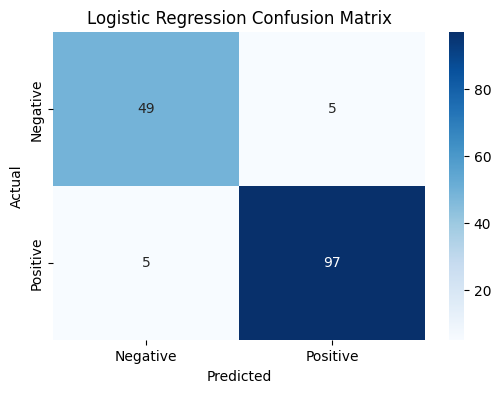

In [ ]:
# code builds a Logistic Regression model for classifying a target variable (class), evaluates it with accuracy, precision, recall, F1 score, and a classification report,
# and then visualizes the confusion matrix.

# Accuracy: Proportion of correct predictions out of all predictions.
# Precision: Proportion of true positives out of all predicted positives.
# Recall: Proportion of true positives out of all actual positives.
# F1 Score: Harmonic mean of precision and recall, balancing both metrics.

# Encode the target variable 'class' to numeric labels
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)  # Encoding training labels
y_test = le_target.transform(y_test)  # Encoding test labels (use transform, not fit_transform)

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Print evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#2: Decision Tree with hyperparameter tuning

Justification for choosing Decision Tree with Hyperparameter Tuning:

A Decision Tree with hyperparameter tuning is well-suited for this dataset due to its ability to handle both numerical (e.g., Age) and categorical features (e.g., Polyuria, Obesity). Decision Trees provide an intuitive structure for understanding complex relationships among the features. Hyperparameter tuning, such as adjusting the max_depth and min_samples_split, can optimize the tree to avoid overfitting and improve predictive performance. This approach allows the model to capture non-linear interactions within the health-related features and provide a robust classification of the class variable.

Decision Tree Best Params: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9743589743589743
Decision Tree Precision: 0.9803921568627451
Decision Tree Recall: 0.9803921568627451
Decision Tree F1 Score: 0.9803921568627451
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



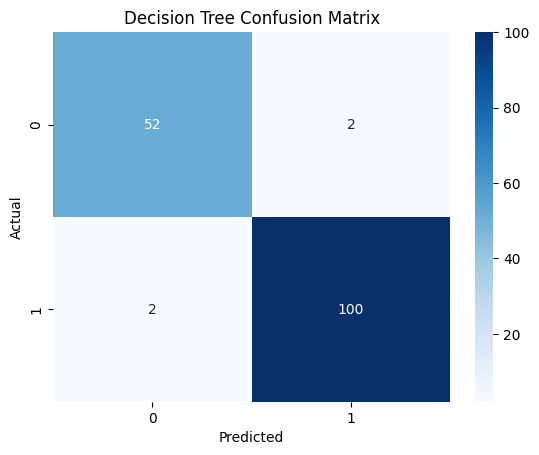

In [ ]:
# code trains a Decision Tree classifier with hyperparameter tuning using GridSearchCV to find the best max_depth and min_samples_split.
# It then evaluates the model's performance using metrics like accuracy, precision, recall, and F1 score.
# The confusion matrix is visualized to show the model's classification errors.

# Model 2: Decision Tree with hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Decision Tree Best Params:", grid_dt.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 3: Support Vector Machine

Justification for choosing Support Vector Machine - SVM:

Support Vector Machine (SVM) is an appropriate choice for this dataset due to its effectiveness in handling high-dimensional data and its ability to find the optimal hyperplane for classification. SVM can efficiently separate complex patterns within the health-related features (e.g., Polyuria, Obesity, Age) by using kernel functions such as the RBF (Radial Basis Function). This helps in capturing non-linear relationships among the features. By maximizing the margin between classes, SVM ensures better generalization, making it well-suited for distinguishing between the class variable in the dataset.

SVM Accuracy: 0.9807692307692307
SVM Precision: 0.9805825242718447
SVM Recall: 0.9901960784313726
SVM F1 Score: 0.9853658536585366
SVM Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.99       102

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



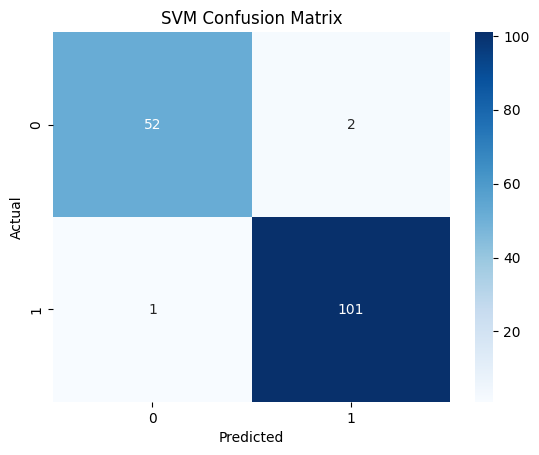

In [ ]:
# code trains a Support Vector Machine (SVM) classifier with probability estimates (probability=True) and evaluates its performance on the test set using accuracy, precision, recall,
# and F1 score. It prints a classification report and visualizes the confusion matrix to show the true/false positives and negatives.

# Model 3: Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 4: k-Nearest Neighbors

Justification for choosing k-Nearest Neighbors - k-NN:

The k-Nearest Neighbors (k-NN) algorithm is a simple yet effective model that can be suitable for this dataset due to its non-parametric nature. It works well when the decision boundaries are irregular and can capture complex relationships between features like Age, Polyuria, Polyphagia, and Obesity without assuming a specific distribution. The algorithm classifies data points based on the majority class of their nearest neighbors, which can be useful when dealing with health indicators that may have clusters within the dataset. Additionally, k-NN is easy to interpret and implement, and it can be tuned by selecting the optimal number of neighbors (k) to balance bias and variance, ensuring robust performance on this classification task.

k-NN Accuracy: 0.9038461538461539
k-NN Precision: 0.967741935483871
k-NN Recall: 0.8823529411764706
k-NN F1 Score: 0.9230769230769231
k-NN Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.97      0.88      0.92       102

    accuracy                           0.90       156
   macro avg       0.89      0.91      0.90       156
weighted avg       0.91      0.90      0.91       156



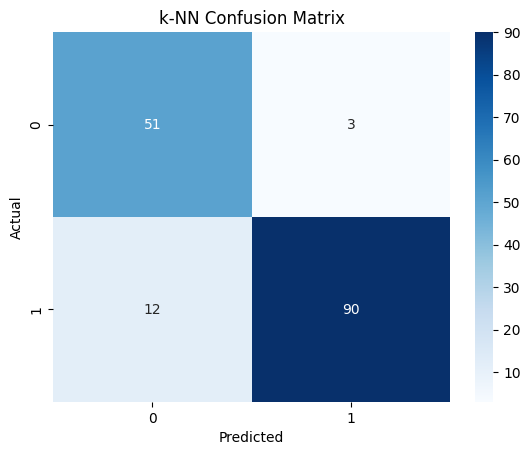

In [ ]:
# code trains a k-Nearest Neighbors (k-NN) classifier with n_neighbors=5 and evaluates its performance on the test set using accuracy, precision, recall, and F1 score.
# It then displays the classification report and visualizes the confusion matrix to show the model's prediction errors.
# The heatmap highlights the true/false positives and negatives.

# Model 4: k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Precision:", precision_score(y_test, y_pred_knn))
print("k-NN Recall:", recall_score(y_test, y_pred_knn))
print("k-NN F1 Score:", f1_score(y_test, y_pred_knn))
print("k-NN Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix for k-NN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("k-NN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Comparision Code

* Code compares the performance of four machine learning models (Logistic Regression, Decision Tree, SVM, and k-NN) using key metrics: Accuracy, Precision, Recall, and F1 Score. It:

* Creates a comparison table of these metrics for each model and prints it.
Plots bar charts for each metric (Accuracy, Precision, Recall, F1 Score) to visually compare the models.
* Plots ROC curves for each model, showing the True Positive Rate vs. False Positive Rate and calculating the AUC (Area Under the Curve) to assess model performance.

  Model  Accuracy  Precision    Recall  F1 Score
0    LR  0.935897   0.950980  0.950980  0.950980
1    DT  0.974359   0.980392  0.980392  0.980392
2   SVM  0.980769   0.980583  0.990196  0.985366
3  k-NN  0.903846   0.967742  0.882353  0.923077


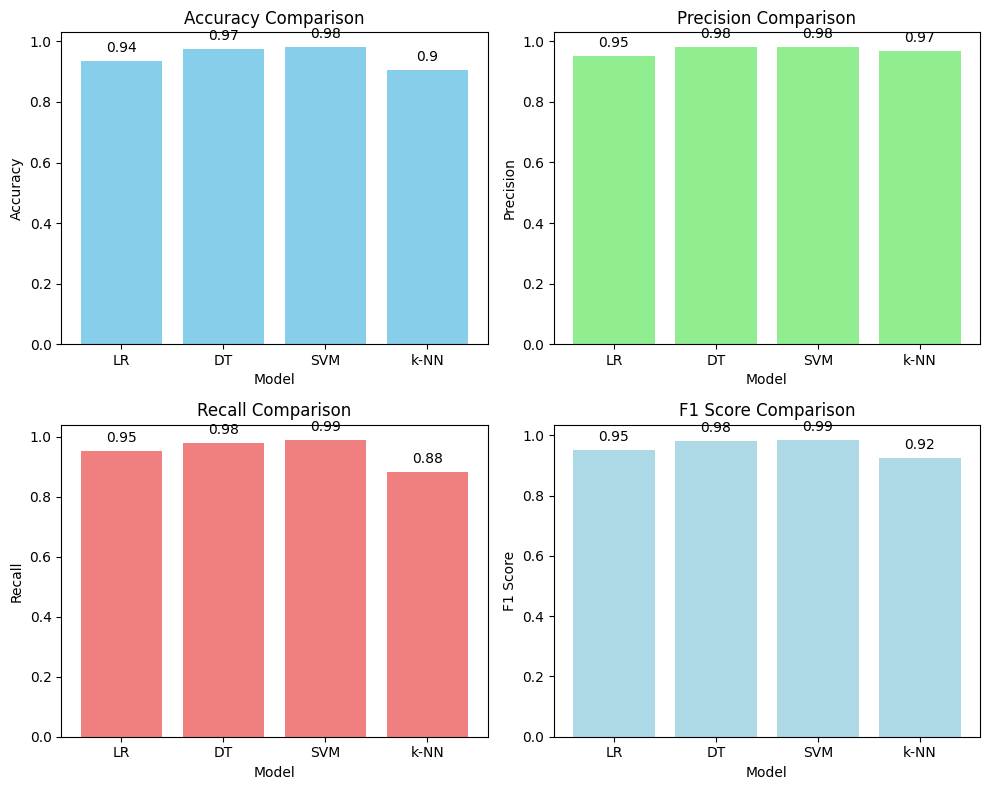

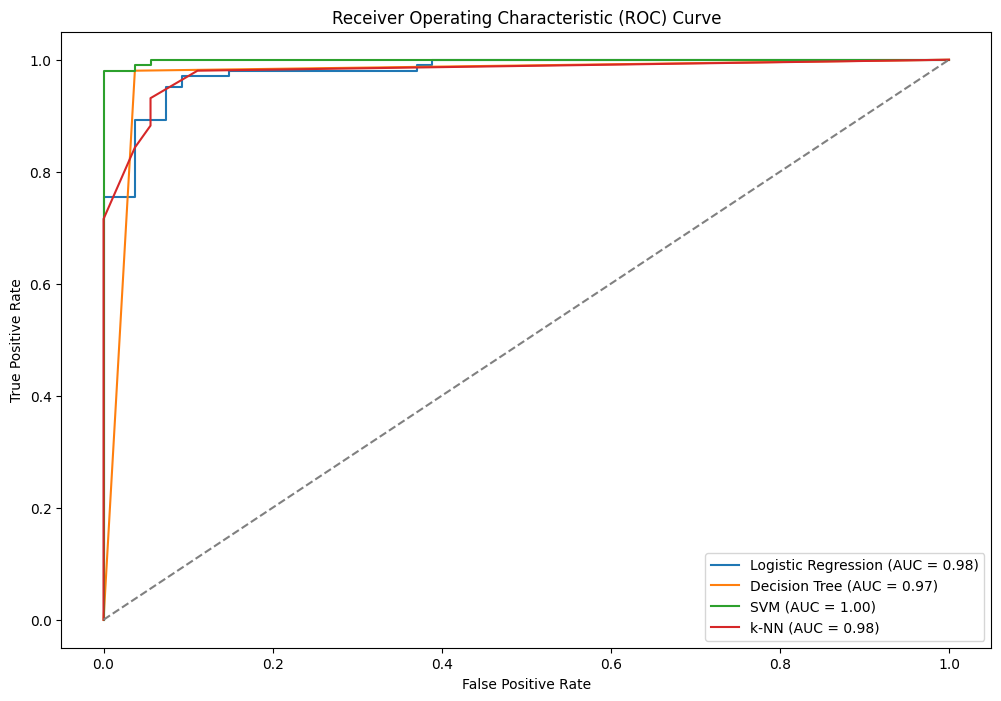

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Assuming models have already been trained (Logistic Regression, Decision Tree, SVM, k-NN) and predictions made (y_pred_lr, y_pred_dt, y_pred_svm, y_pred_knn)

# Dictionary to store the results for all models
comparison_results = {
    'Model': ['LR', 'DT', 'SVM', 'k-NN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn)
    ]
}

# Convert to DataFrame for easier plotting
comparison_df = pd.DataFrame(comparison_results)

# Print the comparison table
print(comparison_df)

# Plot the comparison with updated size and labels
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plot Accuracy
bars = ax[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_xlabel('Model')
ax[0, 0].set_ylabel('Accuracy')

# Add labels with adjusted position to avoid overlap
for bar in bars:
    yval = bar.get_height()
    ax[0, 0].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Plot Precision
bars = ax[0, 1].bar(comparison_df['Model'], comparison_df['Precision'], color='lightgreen')
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_xlabel('Model')
ax[0, 1].set_ylabel('Precision')

# Add labels with adjusted position to avoid overlap
for bar in bars:
    yval = bar.get_height()
    ax[0, 1].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Plot Recall
bars = ax[1, 0].bar(comparison_df['Model'], comparison_df['Recall'], color='lightcoral')
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_xlabel('Model')
ax[1, 0].set_ylabel('Recall')

# Add labels with adjusted position to avoid overlap
for bar in bars:
    yval = bar.get_height()
    ax[1, 0].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Plot F1 Score
bars = ax[1, 1].bar(comparison_df['Model'], comparison_df['F1 Score'], color='lightblue')
ax[1, 1].set_title('F1 Score Comparison')
ax[1, 1].set_xlabel('Model')
ax[1, 1].set_ylabel('F1 Score')

# Add labels with adjusted position to avoid overlap
for bar in bars:
    yval = bar.get_height()
    ax[1, 1].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
models = [(lr, 'Logistic Regression'),
          (grid_dt.best_estimator_, 'Decision Tree'),
          (svm, 'SVM'),
          (knn, 'k-NN')]

plt.figure(figsize=(12, 8))
for model, label in models:
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Conclusion
- **Model Comparison and Discussion:**  

1. **Logistic Regression (LR)** -  
Accuracy: 93.59%  
Precision: 95.10%  
Recall: 95.10%  
F1 Score: 95.10%  
- Strengths: Logistic regression performed well with a strong balance of precision and recall. Its interpretability makes it a useful model for understanding feature impacts and relationships.    
- Weaknesses: While it performed well overall, it may not capture complex non-linear relationships as effectively as tree-based models or SVM.

2. **Decision Tree (DT)** -   
Accuracy: 97.44%  
Precision: 98.04%  
Recall: 98.04%  
F1 Score: 98.04%  
- Strengths: The decision tree exhibited high accuracy and strong metrics across the board, showcasing its ability to capture non-linear relationships within the dataset. The interpretability and visualization of the decision-making process are significant advantages.  
- Weaknesses: Decision trees can be prone to overfitting, although hyperparameter tuning helps mitigate this risk. It may not generalize as well on unseen data without careful pruning or ensemble methods.  

3. **Support Vector Machine (SVM)** -
Accuracy: 98.08%  
Precision: 98.06%  
Recall: 99.02%  
F1 Score: 98.54%  
- Strengths: SVM achieved the highest accuracy and recall, indicating its strength in correctly identifying positive cases. It is particularly effective for complex boundary classification and performs well on high-dimensional data.  
- Weaknesses: SVMs can be computationally intensive, especially with large datasets. It can be challenging to interpret the decision boundary, and tuning parameters like the kernel type and regularization can be complex.  

4. **k-Nearest Neighbors (k-NN)**-  
Accuracy: 90.38%  
Precision: 96.77%  
Recall: 88.24%  
F1 Score: 92.31%   
- Strengths: k-NN demonstrated high precision, suggesting that it was effective at avoiding false positives. It is simple to implement and interpret, making it a good baseline for classification tasks.  
- Weaknesses: k-NN had the lowest recall among the models, indicating it might miss positive cases more frequently. The accuracy is also comparatively lower, which may result from sensitivity to the choice of k and the curse of dimensionality.  


# Interpretation and overall Conclusion:
1. Best Performing Model: The SVM model showed the highest accuracy (98.08%) and recall (99.02%), making it the most effective model for this dataset. Its ability to capture complex decision boundaries likely contributed to its superior performance.  
2. Decision Tree also performed very well, with metrics close to SVM and offering interpretability advantages.    
3. Logistic Regression provides a solid and interpretable baseline but lacks the non-linear flexibility needed for peak performance.
k-NN, while easy to implement, fell short in recall and accuracy compared to the other models.    
- **Overall Conclusion:** SVM emerged as the most robust model for this dataset, balancing high recall and precision with minimal trade-offs. However, considerations around computational efficiency and interpretability might favor the Decision Tree for simpler implementation or explainability needs.

NameError: name 'accuracy_lr' is not defined